#### FIltering 

In [159]:
import pandas as pd

GK_data = pd.read_csv('GK_position.csv')
GK_data=GK_data[['Name','Age','Position','International Reputation','Value','Wage','Body Type', 'Height', 'Weight','Potential', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Reactions', 'Balance', 'Jumping', 'Agility', 'Strength','Stamina','Acceleration','BallControl']]
GK_data

,Name,Age,Position,International Reputation,Value,Wage,Body Type,Height,Weight,Potential,...,GKPositioning,GKReflexes,Reactions,Balance,Jumping,Agility,Strength,Stamina,Acceleration,BallControl
0,De Gea,27,GK,4,€72M,€260K,Lean,6'4,168lbs,93,...,88,94,90,43,67,60,64,43,57,42
1,J. Oblak,25,GK,3,€68M,€94K,Normal,6'2,192lbs,93,...,88,89,86,49,76,67,78,41,43,16
2,M. ter Stegen,26,GK,3,€58M,€240K,Normal,6'2,187lbs,92,...,85,90,85,43,79,37,79,35,38,18
3,T. Courtois,26,GK,4,€53.5M,€240K,Courtois,6'6,212lbs,90,...,86,88,84,45,68,61,70,38,46,23
4,M. Neuer,32,GK,5,€38M,€130K,Normal,6'4,203lbs,89,...,87,87,84,35,77,51,80,43,54,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,L. Wahlstedt,18,GK,1,€50K,€1K,Lean,6'0,176lbs,65,...,45,51,40,29,48,33,38,20,24,12
2021,M. Hurst,22,GK,1,€40K,€1K,Lean,6'1,172lbs,58,...,50,45,47,52,55,45,58,33,40,25
2022,K. Pilkington,44,GK,1,€0,€1K,Normal,6'2,190lbs,48,...,49,46,48,31,45,31,44,22,15,16
2023,J. Milli,18,GK,1,€50K,€1K,Normal,6'3,187lbs,65,...,40,44,37,22,33,39,59,15,20,17


In [160]:

from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()
GK_data['Body Type'] = label_encoder.fit_transform(GK_data['Body Type'])

def convert_to_millions(wage_str):
    wage_str = wage_str.replace('€', '')
    if 'M' in wage_str:
        return float(wage_str.replace('M', ''))
    elif 'K' in wage_str:
        return float(wage_str.replace('K', '')) / 1_000
    return 0

# Array of wage strings
wages = ["1M", "100K"]

# Convert to millions
GK_data['Wage'] = [convert_to_millions(wage) for wage in GK_data['Wage']]
GK_data['Value'] = [convert_to_millions(wage) for wage in GK_data['Value']]

def remove_lbs(val):
    try:
        # Remove commas
        val = val.replace('lbs', '')
        # Convert to float (can handle both integers and floats)
        return float(val)
    except ValueError:
        # Return NaN or some indicator for non-numeric values
        return None

# Apply the function to the desired column
GK_data['Weight'] = GK_data['Weight'].apply(remove_lbs)


def convert_heightinto_cms(val):
    try:
        # Remove commas
        feet, inches = val.split("'")

        # Convert feet and inches to integers
        feet = int(feet)
        inches = int(inches)

        # Calculate the total number of inches
        total_inches = feet * 12 + inches

        # Convert to float (can handle both integers and floats)
        return float(total_inches)
    except ValueError:
        # Return NaN or some indicator for non-numeric values
        return None

# Apply the function to the desired column
GK_data['Height'] = GK_data['Height'].apply(convert_heightinto_cms)

GK_data.head(5)

,Name,Age,Position,International Reputation,Value,Wage,Body Type,Height,Weight,Potential,...,GKPositioning,GKReflexes,Reactions,Balance,Jumping,Agility,Strength,Stamina,Acceleration,BallControl
0,De Gea,27,GK,4,72.0,0.260,1,76.0,168.0,93,...,88,94,90,43,67,60,64,43,57,42
1,J. Oblak,25,GK,3,68.0,0.094,2,74.0,192.0,93,...,88,89,86,49,76,67,78,41,43,16
2,M. ter Stegen,26,GK,3,58.0,0.240,2,74.0,187.0,92,...,85,90,85,43,79,37,79,35,38,18
3,T. Courtois,26,GK,4,53.5,0.240,0,78.0,212.0,90,...,86,88,84,45,68,61,70,38,46,23
4,M. Neuer,32,GK,5,38.0,0.130,2,76.0,203.0,89,...,87,87,84,35,77,51,80,43,54,48


### Correlation

C:\Users\goel6\AppData\Local\Temp\ipykernel_10856\2620102797.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_series.values, y=correlation_series.index, palette='coolwarm')


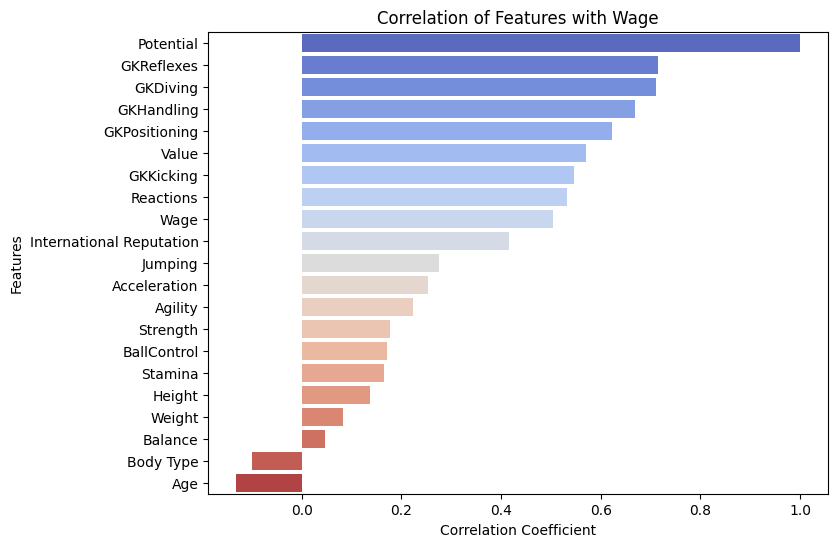

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt


# Dropping 'Name' and 'Position' columns and calculating the correlation with 'Wage'
correlation_series = GK_data.drop(columns=['Name', 'Position']).corr()['Potential'].sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_series.values, y=correlation_series.index, palette='coolwarm')
plt.title('Correlation of Features with Wage')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

### Feature Engineering

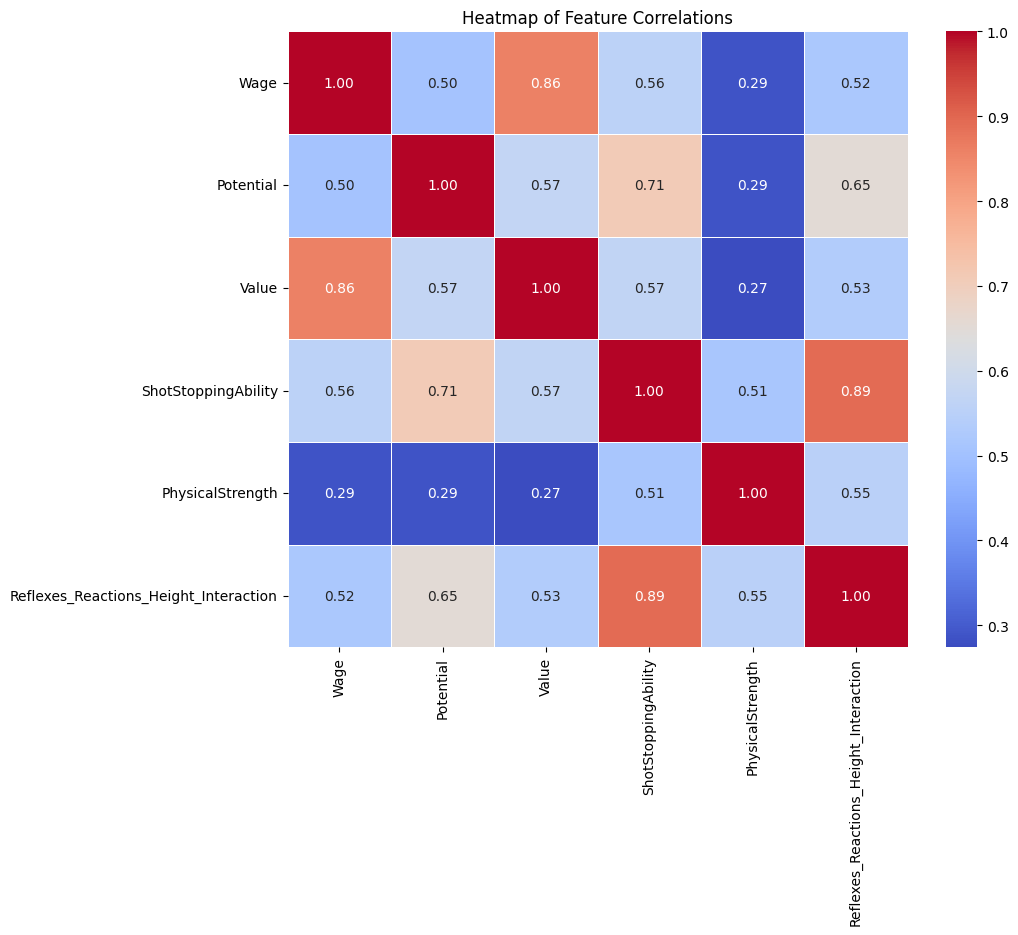

In [162]:
GK_data['ShotStoppingAbility'] = (
    GK_data['GKDiving'] *0.35 +
    GK_data['GKHandling'] *0.25 +
    GK_data['GKPositioning'] * 0.20 +
    GK_data['GKKicking'] *0.20
)
GK_data['PhysicalStrength'] = (
    GK_data['Strength'] +
    GK_data['Agility']  +
    GK_data['Balance'] +
    GK_data['Acceleration'] +
    GK_data['Stamina'] +
    GK_data['Jumping'] 
)
GK_data['Reflexes_Reactions_Height_Interaction'] = (
    GK_data['GKReflexes'] *0.4 +
    GK_data['Reactions'] * 0.40 +
    GK_data['Height'] *0.20
)
GK_data[['Wage','Potential','Value']].corr()['Potential']

numeric_data = GK_data[['Wage','Potential','Value','ShotStoppingAbility','PhysicalStrength','Reflexes_Reactions_Height_Interaction']]

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


In [163]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load dataset (example using Boston housing data)
x=['ShotStoppingAbility','PhysicalStrength','Reflexes_Reactions_Height_Interaction','Value']
y=['Potential']

x_train, x_test, y_train, y_test = train_test_split(GK_data[x],GK_data[y],test_size=0.3, random_state=42)

# Define base models
rf = RandomForestRegressor(n_estimators=50, random_state=42)
xgb = XGBRegressor(n_estimators=50,  eval_metric='rmse', random_state=42)

# Define meta-model
meta_model = LinearRegression()

# Create stacking regressor
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model
)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Predict and evaluate
y_pred = stacking_model.predict(x_test)
y_pred_train = stacking_model.predict(x_train)

print(f'Test - {r2_score(y_test,y_pred)}')
print(f'Train - {r2_score(y_train,y_pred_train)}')


C:\Users\goel6\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test - 0.8940886328688913
Train - 0.9859137013178143


### Ridge Regression

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

x=['ShotStoppingAbility','PhysicalStrength','Reflexes_Reactions_Height_Interaction','Value']
y=['Potential']

x_train, x_test, y_train, y_test = train_test_split(GK_data[x],GK_data[y],test_size=0.3, random_state=42)

Ridge_model = Ridge()
Ridge_model.fit(x_train,y_train)

pred_ridge_y_test= Ridge_model.predict(x_test)
pred_ridge_y_train= Ridge_model.predict(x_train)

pred_ridge_y_test = np.array(pred_ridge_y_test).flatten().tolist()
pred_ridge_y_train = np.array(pred_ridge_y_train).flatten().tolist()

print(f'Test - {r2_score(y_test,pred_ridge_y_test)}')
print(f'Train - {r2_score(y_train,pred_ridge_y_train)}')

Test - 0.5370790484134209
Train - 0.5625659806154231


### Random Forest

In [165]:
# 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None
RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(x_train,y_train)

pred_RandomForest_y_test=RandomForest_model.predict(x_test)
pred_RandomForest_y_train=RandomForest_model.predict(x_train)

print(f'Test - {r2_score(y_test,pred_RandomForest_y_test)}')
print(f'Train - {r2_score(y_train,pred_RandomForest_y_train)}')


C:\Users\goel6\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test - 0.8889590387294378
Train - 0.9835076252652433


### XG Boost

In [166]:
import xgboost as xgb

XGboost_model = xgb.XGBRegressor(objective ='reg:squarederror')
XGboost_model.fit(x_train, y_train)

pred_XGboost_y_test=XGboost_model.predict(x_test)
pred_XGboost_y_train=XGboost_model.predict(x_train)

print(f'XGBoost Test - {r2_score(y_test,pred_XGboost_y_test)}')
print(f'XGBoost Train - {r2_score(y_train,pred_XGboost_y_train)}')


XGBoost Test - 0.8831995725631714
XGBoost Train - 0.9956491589546204


#### HYBRID MODEL

In [167]:
combine_test =((pred_XGboost_y_test+pred_RandomForest_y_test+pred_ridge_y_test)/3)
combine_train= (pred_XGboost_y_train+pred_RandomForest_y_train+pred_ridge_y_train)/3

print(f'Test - {r2_score(y_test,combine_test)}')
print(f'Train - {r2_score(y_train,combine_train)}')

Test - 0.8492305657445993
Train - 0.9338639466875761


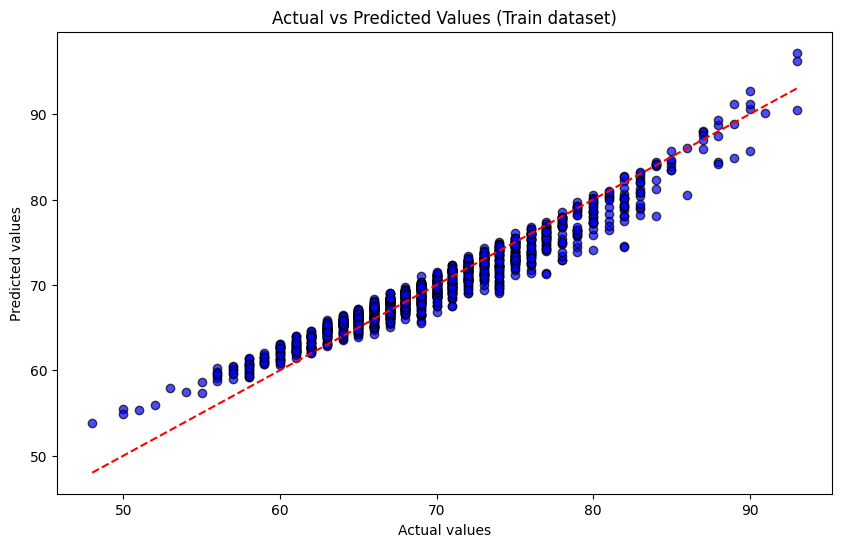

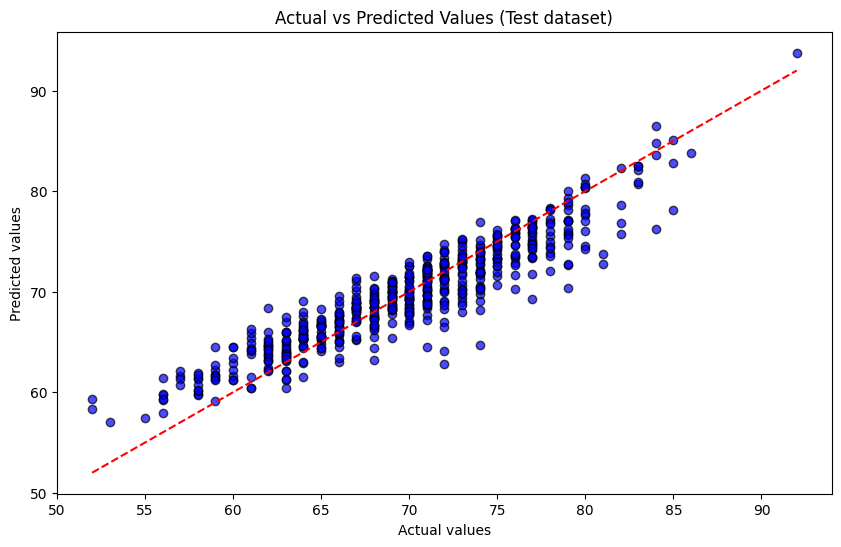

In [168]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, combine_train, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values (Train dataset)')
plt.show()

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, combine_test, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values (Test dataset)')
plt.show()

### Feature Importance

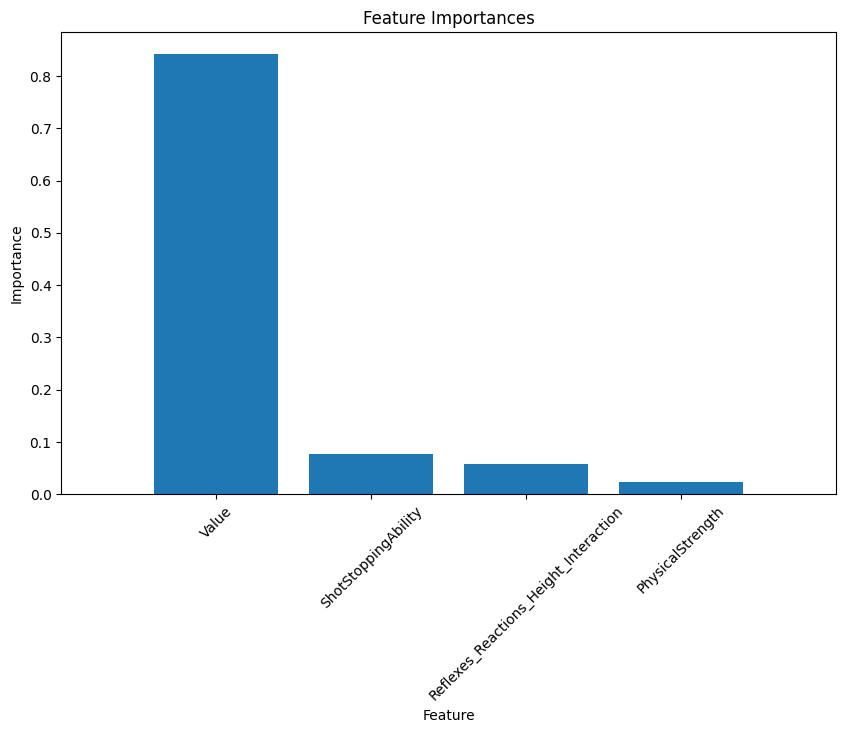

In [169]:
import numpy as np

importances = XGboost_model.feature_importances_
x=GK_data[x]

indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), np.array(features)[indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## Model

* Regression Models: If predicting a continuous performance metric (e.g., predicted score), use models like Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor.
Classification Models: If categorizing goalkeepers into performance tiers (e.g., top performers vs. average performers), use models like Logistic Regression, Random Forest Classifier, or Support Vector Machines (SVM).

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np


x=['Potential','International Reputation','Value']
y=['Wage']

x_train, x_test, y_train, y_test = train_test_split(GK_data[x],GK_data[y],test_size=0.3, random_state=42)

RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(x_train,y_train)

pred_RandomForest_y_test=RandomForest_model.predict(x_test)
pred_RandomForest_y_train=RandomForest_model.predict(x_train)

print(f'Test - {r2_score(y_test,pred_RandomForest_y_test)}')
print(f'Train - {r2_score(y_train,pred_RandomForest_y_train)}')



XGboost_model = xgb.XGBRegressor(objective ='reg:squarederror')
XGboost_model.fit(x_train, y_train)

pred_XGboost_y_test=XGboost_model.predict(x_test)
pred_XGboost_y_train=XGboost_model.predict(x_train)

print(f'XGBoost Test - {r2_score(y_test,pred_XGboost_y_test)}')
print(f'XGBoost Train - {r2_score(y_train,pred_XGboost_y_train)}')



Ridge_model = Ridge()
Ridge_model.fit(x_train,y_train)

pred_ridge_y_test= Ridge_model.predict(x_test)
pred_ridge_y_train= Ridge_model.predict(x_train)

pred_ridge_y_test = np.array(pred_ridge_y_test).flatten().tolist()
pred_ridge_y_train = np.array(pred_ridge_y_train).flatten().tolist()

print(f'Test - {r2_score(y_test,pred_ridge_y_test)}')
print(f'Train - {r2_score(y_train,pred_ridge_y_train)}')
# GK_data[['Potential','International Reputation','Value','Wage']].corr()

C:\Users\goel6\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test - 0.6802147594206986
Train - 0.9363199037043126
XGBoost Test - 0.6006605625152588
XGBoost Train - 0.9638380408287048
Test - 0.7262506366068433
Train - 0.784878017614091


In [173]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Define base models
rf = RandomForestRegressor(n_estimators=50, random_state=42)
xgb = XGBRegressor(n_estimators=50,  eval_metric='rmse', random_state=42)

# Define meta-model
meta_model = LinearRegression()

# Create stacking regressor
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model
)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Predict and evaluate
y_pred = stacking_model.predict(x_test)
y_pred_train = stacking_model.predict(x_train)

print(f'Test - {r2_score(y_test,y_pred)}')
print(f'Train - {r2_score(y_train,y_pred_train)}')


C:\Users\goel6\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test - 0.6998912247092524
Train - 0.9104839815005544


<!-- Regression Models: If predicting a continuous performance metric (e.g., predicted score), use models like Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor.
Classification Models: If categorizing goalkeepers into performance tiers (e.g., top performers vs. average performers), use models like Logistic Regression, Random Forest Classifier, or Support Vector Machines (SVM). -->